# Customer Churn Analysis (Banking)

## Objective
Analyze customer churn to understand churn rate, identify high-risk segments, and provide actionable recommendations to improve customer retention.


## Dataset & Target
- Dataset: Customer banking attributes (credit score, geography, age, tenure, balance, products, activity, salary, etc.)
- Target: `Exited`
  - 0 = retained customer
  - 1 = churned customer


## Approach
1. Load and inspect data
2. Clean data (remove irrelevant identifiers, check duplicates/nulls)
3. Validate numeric ranges & outliers
4. Answer business questions using churn KPIs and visualizations
5. Summarize insights & recommendations


## Tools
Python (Pandas, Matplotlib)


In [80]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings 
warnings.simplefilter("ignore")

In [81]:
# Load churn dataset
df=pd.read_csv("Churn_Modelling.csv")
df.head(10)

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
5,6,15574012,Chu,645,Spain,Male,44,8,113755.78,2,1,0,149756.71,1
6,7,15592531,Bartlett,822,France,Male,50,7,0.00,2,1,1,10062.80,0
7,8,15656148,Obinna,376,Germany,Female,29,4,115046.74,4,1,0,119346.88,1
8,9,15792365,He,501,France,Male,44,4,142051.07,2,0,1,74940.50,0
9,10,15592389,H?,684,France,Male,27,2,134603.88,1,1,1,71725.73,0


In [82]:
df.shape

(10000, 14)

In [83]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [84]:
# Drop identifier columns that do not help explain churn

df = df.drop(columns=["CustomerId","RowNumber", "Surname"])
df

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...
9995,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


In [85]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CreditScore      10000 non-null  int64  
 1   Geography        10000 non-null  object 
 2   Gender           10000 non-null  object 
 3   Age              10000 non-null  int64  
 4   Tenure           10000 non-null  int64  
 5   Balance          10000 non-null  float64
 6   NumOfProducts    10000 non-null  int64  
 7   HasCrCard        10000 non-null  int64  
 8   IsActiveMember   10000 non-null  int64  
 9   EstimatedSalary  10000 non-null  float64
 10  Exited           10000 non-null  int64  
dtypes: float64(2), int64(7), object(2)
memory usage: 859.5+ KB


In [86]:
df.columns.tolist()

['CreditScore',
 'Geography',
 'Gender',
 'Age',
 'Tenure',
 'Balance',
 'NumOfProducts',
 'HasCrCard',
 'IsActiveMember',
 'EstimatedSalary',
 'Exited']

In [87]:
df['CreditScore'].unique()

array([619, 608, 502, 699, 850, 645, 822, 376, 501, 684, 528, 497, 476,
       549, 635, 616, 653, 587, 726, 732, 636, 510, 669, 846, 577, 756,
       571, 574, 411, 591, 533, 553, 520, 722, 475, 490, 804, 582, 472,
       465, 556, 834, 660, 776, 829, 637, 550, 698, 585, 788, 655, 601,
       656, 725, 511, 614, 742, 687, 555, 603, 751, 581, 735, 661, 675,
       738, 813, 657, 604, 519, 664, 678, 757, 416, 665, 777, 543, 506,
       493, 652, 750, 729, 646, 647, 808, 524, 769, 730, 515, 773, 814,
       710, 413, 623, 670, 622, 785, 605, 479, 685, 538, 562, 721, 628,
       668, 828, 674, 625, 432, 770, 758, 795, 686, 789, 589, 461, 584,
       579, 663, 682, 793, 691, 485, 650, 754, 535, 716, 539, 706, 586,
       631, 717, 800, 683, 704, 615, 667, 484, 480, 578, 512, 606, 597,
       778, 514, 525, 715, 580, 807, 521, 759, 516, 711, 618, 643, 671,
       689, 620, 676, 572, 695, 592, 567, 694, 547, 594, 673, 610, 767,
       763, 712, 703, 662, 659, 523, 772, 545, 634, 739, 771, 68

In [88]:
df['CreditScore'].nunique()

460

In [89]:
df['Geography'].unique()

array(['France', 'Spain', 'Germany'], dtype=object)

In [90]:
df['Geography'].nunique()

3

In [91]:
df['Gender'].unique()

array(['Female', 'Male'], dtype=object)

In [92]:
df['Gender'].nunique()

2

In [93]:
df['Age'].unique()


array([42, 41, 39, 43, 44, 50, 29, 27, 31, 24, 34, 25, 35, 45, 58, 32, 38,
       46, 36, 33, 40, 51, 61, 49, 37, 19, 66, 56, 26, 21, 55, 75, 22, 30,
       28, 65, 48, 52, 57, 73, 47, 54, 72, 20, 67, 79, 62, 53, 80, 59, 68,
       23, 60, 70, 63, 64, 18, 82, 69, 74, 71, 76, 77, 88, 85, 84, 78, 81,
       92, 83])

In [94]:
df['Age'].nunique()

70

In [95]:
df['Tenure'].unique()

array([ 2,  1,  8,  7,  4,  6,  3, 10,  5,  9,  0])

In [96]:
df['Tenure'].nunique()

11

In [97]:
df['Balance'].unique()

array([     0.  ,  83807.86, 159660.8 , ...,  57369.61,  75075.31,
       130142.79], shape=(6382,))

In [98]:
df['Balance'].nunique()

6382

In [99]:
df['NumOfProducts'].unique()

array([1, 3, 2, 4])

In [100]:
df['NumOfProducts'].nunique()

4

In [101]:
df['HasCrCard'].unique()

array([1, 0])

In [102]:
df['HasCrCard'].nunique()

2

In [103]:
df['IsActiveMember'].unique()

array([1, 0])

In [104]:
df['IsActiveMember'].nunique()

2

In [105]:
df['EstimatedSalary'].unique()

array([101348.88, 112542.58, 113931.57, ...,  42085.58,  92888.52,
        38190.78], shape=(9999,))

In [106]:
df['EstimatedSalary'].nunique()

9999

In [107]:
df['Exited'].unique()

array([1, 0])

## Duplicate Check
Check whether any fully duplicated rows exist. Transaction-level duplicates can distort churn rates.


In [109]:
df.duplicated().sum()

np.int64(0)

## Missing Values Check
Check missing values to decide whether imputation or row removal is needed.


In [111]:
df.isnull().sum()

CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

## Outlier & Range Validation
Validate numeric columns and ensure values fall within reasonable business ranges.
Outliers are inspected for plausibility, not blindly removed.


In [113]:
# we dont check outlier for categorical values

In [190]:
# Numeric columns only (categorical columns are excluded from outlier checks)
numeric_cols = [
    "CreditScore",
    "Age",
    "Tenure",
    "Balance",
    "EstimatedSalary"
]

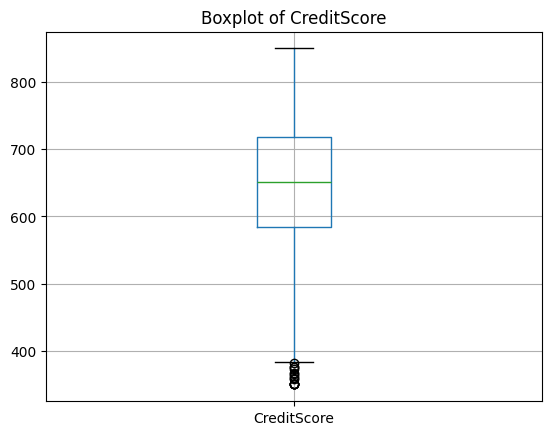

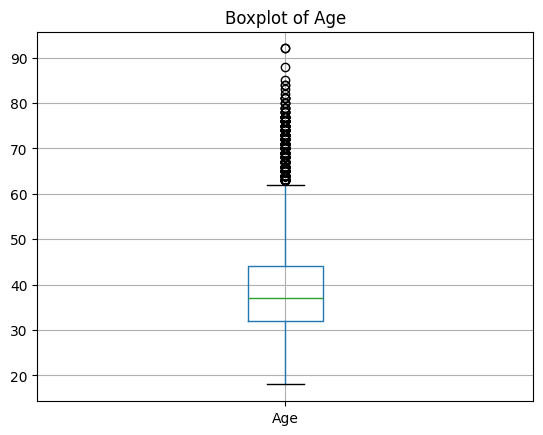

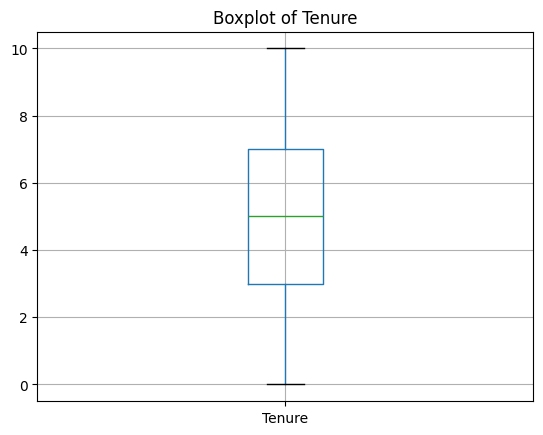

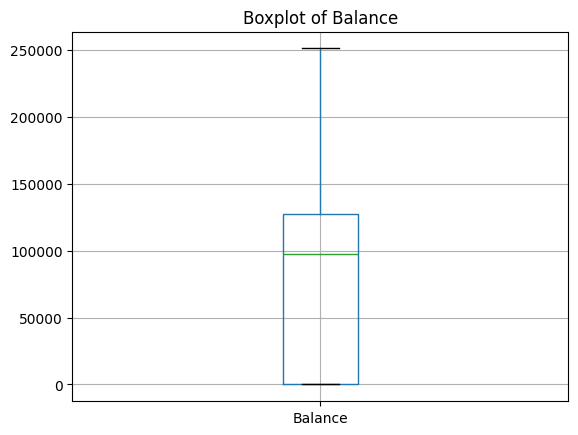

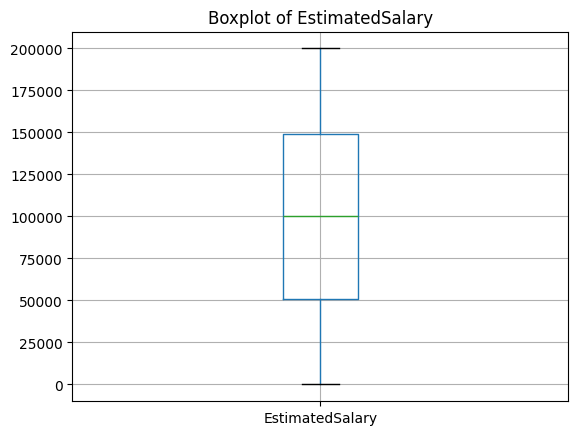

In [115]:
import matplotlib.pyplot as plt

for col in numeric_cols:
    df.boxplot(column=col)
    plt.title(f"Boxplot of {col}")
    plt.show()


In [116]:
outlier_summary = {}

for col in numeric_cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    
    outliers = df[
        (df[col] < Q1 - 1.5 * IQR) |
        (df[col] > Q3 + 1.5 * IQR)
    ]
    
    outlier_summary[col] = len(outliers)

outlier_summary


{'CreditScore': 15,
 'Age': 359,
 'Tenure': 0,
 'Balance': 0,
 'EstimatedSalary': 0}

In [117]:
df[(df["CreditScore"] < 300) | (df["CreditScore"] > 850)]


,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited


In [118]:
df["Age"].min(), df["Age"].max()


(np.int64(18), np.int64(92))

In [119]:
df[(df["Age"] < 18) | (df["Age"] > 100)]


,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited


## Q1: What percentage of customers have churned?

**Why it matters:** This is the headline KPI that measures retention health.  
**Metric:** Churn Rate = mean(Exited)


In [121]:
churn_rate = df["Exited"].value_counts(normalize=True) * 100
churn_rate


Exited
0    79.63
1    20.37
Name: proportion, dtype: float64

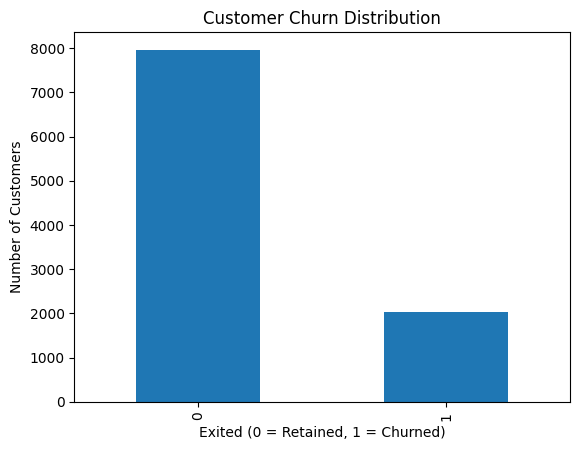

In [122]:
import matplotlib.pyplot as plt

df["Exited"].value_counts().plot(kind="bar")
plt.title("Customer Churn Distribution")
plt.xlabel("Exited (0 = Retained, 1 = Churned)")
plt.ylabel("Number of Customers")
plt.show()


**Insight:**  
This churn rate provides the baseline. The next steps identify which segments contribute most to churn.


## Q2: Does churn vary by geography?

**Why it matters:** Helps prioritize markets for retention strategy.  
**Metric:** Mean churn rate per geography


In [124]:
geo_churn = df.groupby("Geography")["Exited"].mean().sort_values(ascending=False)
geo_churn


Geography
Germany    0.324432
Spain      0.166734
France     0.161548
Name: Exited, dtype: float64

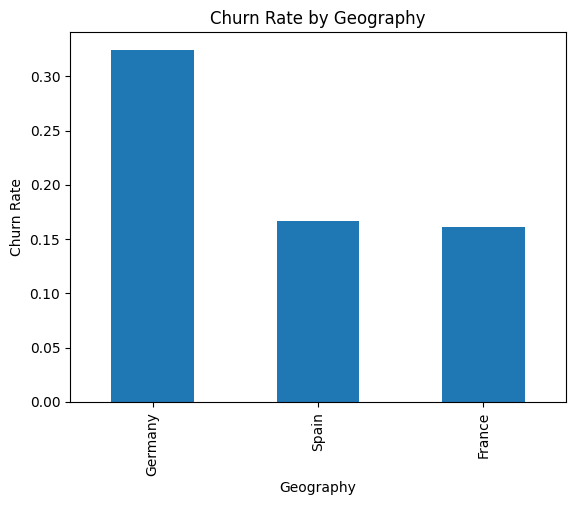

In [125]:
import matplotlib.pyplot as plt

geo_churn.plot(kind="bar")
plt.title("Churn Rate by Geography")
plt.xlabel("Geography")
plt.ylabel("Churn Rate")
plt.show()



**Insight:**  
Some regions show higher churn, suggesting market-specific retention actions may be required.


## Q3: Are inactive customers more likely to churn?

**Why it matters:** Activity is a strong indicator of engagement and churn risk.  
**Metric:** Churn rate by `IsActiveMember`


In [127]:
activity_churn = df.groupby("IsActiveMember")["Exited"].mean()
activity_churn


IsActiveMember
0    0.268509
1    0.142691
Name: Exited, dtype: float64

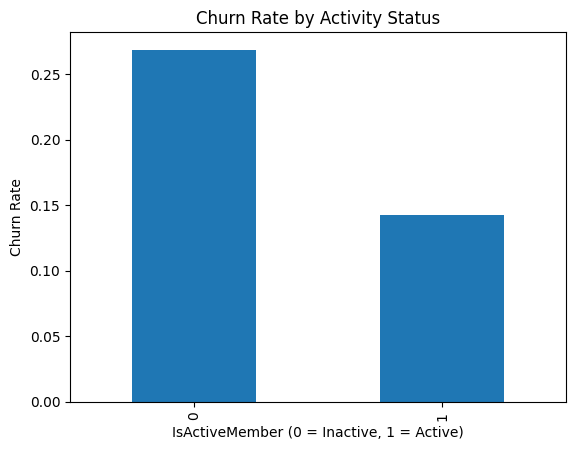

In [128]:
import matplotlib.pyplot as plt

activity_churn.plot(kind="bar")
plt.title("Churn Rate by Activity Status")
plt.xlabel("IsActiveMember (0 = Inactive, 1 = Active)")
plt.ylabel("Churn Rate")
plt.show()


**Insight:**  
Inactive customers typically churn at a higher rate, indicating engagement programs can reduce churn.


## Q4: How does age relate to churn?

**Why it matters:** Age segments help tailor product and retention strategy.  
**Metric:** Churn rate by age group


In [130]:
import pandas as pd

df["AgeGroup"] = pd.cut(
    df["Age"],
    bins=[18, 30, 40, 50, 60, 100],
    labels=["18–30", "30–40", "40–50", "50–60", "60+"]
)


In [131]:
age_churn = df.groupby("AgeGroup")["Exited"].mean()
age_churn


AgeGroup
18–30    0.075026
30–40    0.120872
40–50    0.339655
50–60    0.562108
60+      0.247845
Name: Exited, dtype: float64

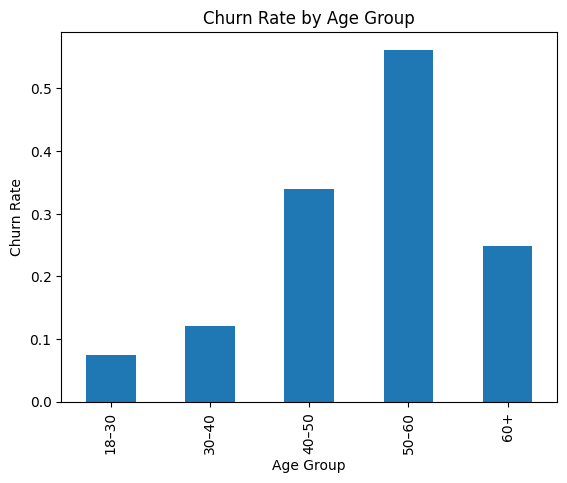

In [132]:
import matplotlib.pyplot as plt

age_churn.plot(kind="bar")
plt.title("Churn Rate by Age Group")
plt.xlabel("Age Group")
plt.ylabel("Churn Rate")
plt.show()


**Insight:**  
Churn varies by life-stage; targeted messaging and product fit can improve retention in high-risk age groups.


## Q5: How does the number of products impact churn?

**Why it matters:** Product holding is a proxy for customer depth/loyalty.  
**Metric:** Churn rate by `NumOfProducts`


In [134]:
product_churn = df.groupby("NumOfProducts")["Exited"].mean()
product_churn


NumOfProducts
1    0.277144
2    0.075817
3    0.827068
4    1.000000
Name: Exited, dtype: float64

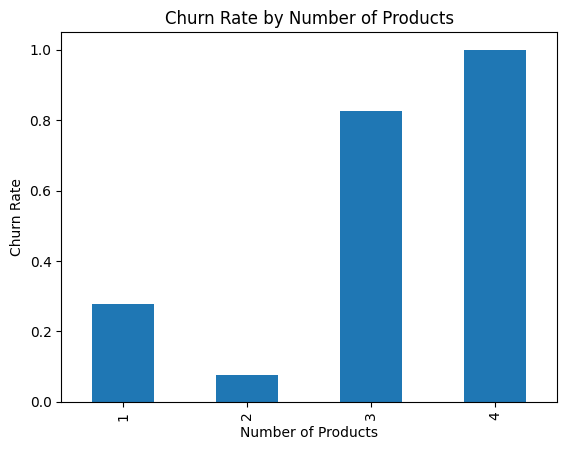

In [135]:
import matplotlib.pyplot as plt

product_churn.plot(kind="bar")
plt.title("Churn Rate by Number of Products")
plt.xlabel("Number of Products")
plt.ylabel("Churn Rate")
plt.show()


In [136]:
df["NumOfProducts"].value_counts()


NumOfProducts
1    5084
2    4590
3     266
4      60
Name: count, dtype: int64

**Insight:**  
Churn differences across product counts suggest cross-sell/engagement opportunities for low-product customers.


## Key Insights
- Churn rate provides a baseline measure of retention health.
- Churn varies across customer segments such as geography, activity status, age group, and product holding.
- Inactive customers and certain demographic/product segments represent higher churn risk.

## Recommendations
- Prioritize retention efforts for high-churn geographies and inactive customers.
- Improve early-lifecycle engagement for customers showing low activity.
- Use targeted offers and cross-sell strategies to increase product holding for low-engagement customers.
